In [2]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Loan_status_2007-2020Q3.csv", nrows = 10000)

In [4]:
# Display the first few rows of the dataset
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


# Exploratory data analysis

In [6]:
# Display the column names
df.columns

Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_length', 'hardship_dpd', 'hardship_loan_status',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag'],
      dtype='object', length=142)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(97), int64(21), object(24)
memory usage: 10.8+ MB


In [8]:
pd.set_option('display.max_rows', None)
df.isna().sum()

Unnamed: 0                                        0
id                                                0
loan_amnt                                         0
funded_amnt                                       0
funded_amnt_inv                                   0
term                                              0
int_rate                                          0
installment                                       0
grade                                             0
sub_grade                                         0
emp_title                                       652
emp_length                                      355
home_ownership                                    0
annual_inc                                        0
verification_status                               0
issue_d                                           0
loan_status                                       0
pymnt_plan                                        0
url                                               0
purpose     

In [9]:
# Columns to drop
columns_to_drop = [
    'Unnamed: 0',  # Index or row number
    'id',          # Unique identifier
    'grade',       # Risk category
    'sub_grade',   # Sub-category of risk
    'int_rate',    # Interest rate
    'installment', # Monthly payment amount
    'funded_amnt', 'funded_amnt_inv',  # Funding amounts
    'total_pymnt', 'total_rec_prncp', 'total_rec_int',  # Total payments
    'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',  # Hardship and payment dates
    'hardship_length', 'hardship_dpd', 'hardship_loan_status',  # Hardship details
    'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', # Hardship amounts
    'debt_settlement_flag' # Debt settlement indicator
]

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop)

# Filter the DataFrame
df_cleaned = df_cleaned[df_cleaned['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Verify the remaining columns
df_cleaned.columns

Index(['loan_amnt', 'term', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan',
       ...
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med', 'hardship_flag', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount'],
      dtype='object', length=121)

In [10]:
# Print all column names
print(df_cleaned.columns.tolist())

['loan_amnt', 'term', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open

In [11]:
# Additional columns to drop
additional_columns_to_drop = [
    'url', 'issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
    'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_late_fee',
    'recoveries', 'collection_recovery_fee',
    'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'revol_bal_joint',
    'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line',
    'total_rev_hi_lim', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
    'total_il_high_credit_limit',
    'num_rev_accts', 'num_op_rev_tl', 'num_actv_rev_tl', 'num_bc_tl', 'num_il_tl',
    'num_bc_sats', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
    'num_tl_op_past_12m',
    'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
    'deferral_term', 'hardship_amount',
    'policy_code' # contains only 1 and nan
]

# Drop the columns
df_cleaned = df_cleaned.drop(columns=additional_columns_to_drop)


In [12]:
df_cleaned.columns

Index(['loan_amnt', 'term', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_1

In [13]:
df_cleaned.shape

(10000, 80)

In [14]:
# Set a threshold for missing values (e.g., more than 50% missing)
threshold = 0.5

# Calculate the percentage of missing values for each column
missing_percentage = df_cleaned.isna().mean()

# Create a list of columns with missing values greater than the threshold
columns_with_too_many_missing_values = missing_percentage[missing_percentage > threshold].index.tolist()

df_cleaned = df_cleaned.drop(columns=columns_with_too_many_missing_values)

In [15]:
df_cleaned.shape

(10000, 35)

In [16]:
df_cleaned.describe()

,loan_amnt,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.000000,10000.0
mean,12861.637500,7.026650e+04,13.990554,0.133500,713.711000,717.711000,0.849600,9.472200,0.046800,14008.839200,22.540600,3365.655937,690.294400,677.137500,0.0,0.0,0.0,0.0,0.039300,0.0
std,8491.813747,4.832114e+04,6.612879,0.459673,34.847093,34.847093,1.040427,4.264885,0.214975,15205.930733,11.098264,5291.680171,81.734729,120.966387,0.0,0.0,0.0,0.0,0.195344,0.0
min,1000.000000,6.000000e+03,0.000000,0.000000,660.000000,664.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
25%,6000.000000,4.200000e+04,8.940000,0.000000,685.000000,689.000000,0.000000,6.000000,0.000000,4767.750000,14.000000,277.250000,639.000000,635.000000,0.0,0.0,0.0,0.0,0.000000,0.0
50%,11200.000000,6.000000e+04,14.020000,0.000000,710.000000,714.000000,1.000000,9.000000,0.000000,10160.500000,21.000000,711.990000,699.000000,695.000000,0.0,0.0,0.0,0.0,0.000000,0.0
75%,17500.000000,8.450000e+04,19.150000,0.000000,740.000000,744.000000,1.000000,12.000000,0.000000,17815.250000,29.000000,4379.170000,749.000000,745.000000,0.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,1.782000e+06,29.920000,6.000000,825.000000,829.000000,8.000000,34.000000,2.000000,148804.000000,79.000000,36115.200000,850.000000,845.000000,0.0,0.0,0.0,0.0,2.000000,0.0


In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   10000 non-null  int64  
 1   term                        10000 non-null  object 
 2   emp_title                   9348 non-null   object 
 3   emp_length                  9645 non-null   object 
 4   home_ownership              10000 non-null  object 
 5   annual_inc                  10000 non-null  float64
 6   verification_status         10000 non-null  object 
 7   loan_status                 10000 non-null  object 
 8   pymnt_plan                  10000 non-null  object 
 9   purpose                     10000 non-null  object 
 10  title                       10000 non-null  object 
 11  zip_code                    10000 non-null  object 
 12  addr_state                  10000 non-null  object 
 13  dti                         1000

In [18]:
df_cleaned.loan_status

0        Fully Paid
1       Charged Off
2        Fully Paid
3        Fully Paid
4        Fully Paid
5        Fully Paid
6        Fully Paid
7        Fully Paid
8       Charged Off
9       Charged Off
10       Fully Paid
11       Fully Paid
12      Charged Off
13       Fully Paid
14      Charged Off
15       Fully Paid
16       Fully Paid
17       Fully Paid
18       Fully Paid
19       Fully Paid
20       Fully Paid
21      Charged Off
22       Fully Paid
23       Fully Paid
24      Charged Off
25       Fully Paid
26      Charged Off
27      Charged Off
28       Fully Paid
29       Fully Paid
30       Fully Paid
31       Fully Paid
32       Fully Paid
33       Fully Paid
34       Fully Paid
35       Fully Paid
36       Fully Paid
37       Fully Paid
38       Fully Paid
39       Fully Paid
40       Fully Paid
41       Fully Paid
42       Fully Paid
43       Fully Paid
44       Fully Paid
45       Fully Paid
46      Charged Off
47       Fully Paid
48       Fully Paid
49       Fully Paid


/home/mohamed/miniconda3/envs/data_protection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mohamed/miniconda3/envs/data_protection/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mohamed/miniconda3/envs/data_protection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mohamed/miniconda3/envs/data_protection/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

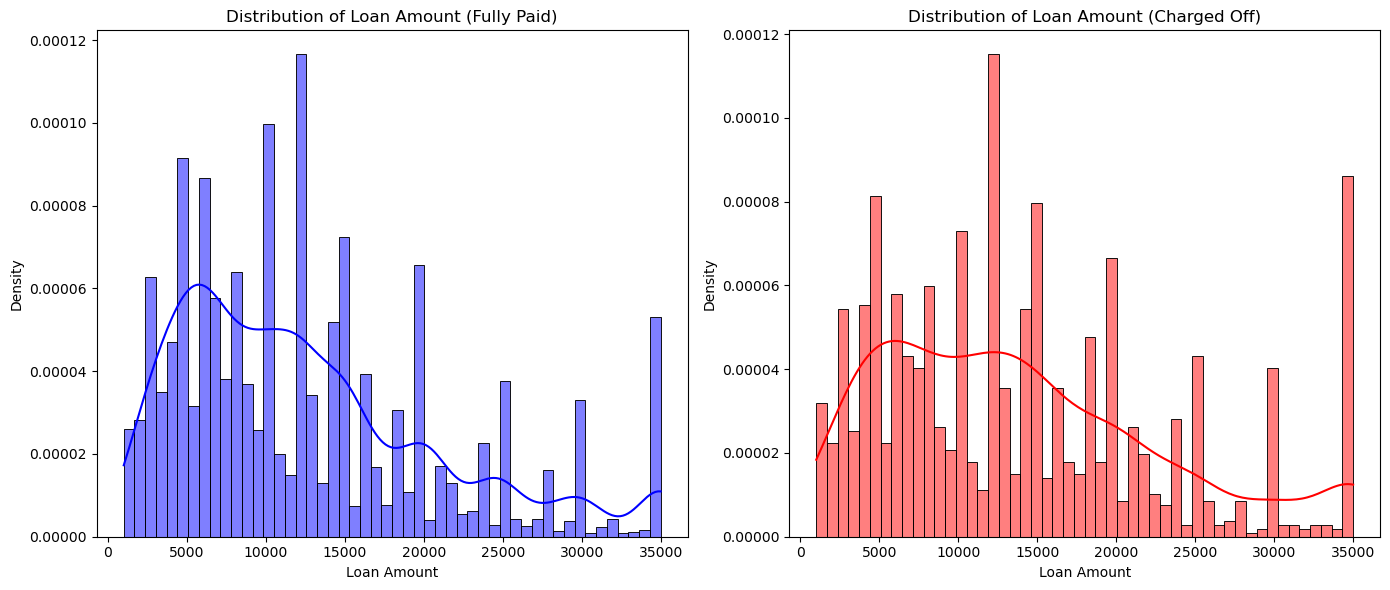

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the data based on loan_status
fully_paid = df_cleaned[df_cleaned['loan_status'] == 'Fully Paid']
charged_off = df_cleaned[df_cleaned['loan_status'] == 'Charged Off']

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Plot histogram for Fully Paid loans
plt.subplot(1, 2, 1)
sns.histplot(fully_paid['loan_amnt'], bins=50, kde=True, color='blue', stat='density')
plt.title('Distribution of Loan Amount (Fully Paid)')
plt.xlabel('Loan Amount')
plt.ylabel('Density')

# Plot histogram for Charged Off loans
plt.subplot(1, 2, 2)
sns.histplot(charged_off['loan_amnt'], bins=50, kde=True, color='red', stat='density')
plt.title('Distribution of Loan Amount (Charged Off)')
plt.xlabel('Loan Amount')
plt.ylabel('Density')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


/home/mohamed/miniconda3/envs/data_protection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mohamed/miniconda3/envs/data_protection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mohamed/miniconda3/envs/data_protection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


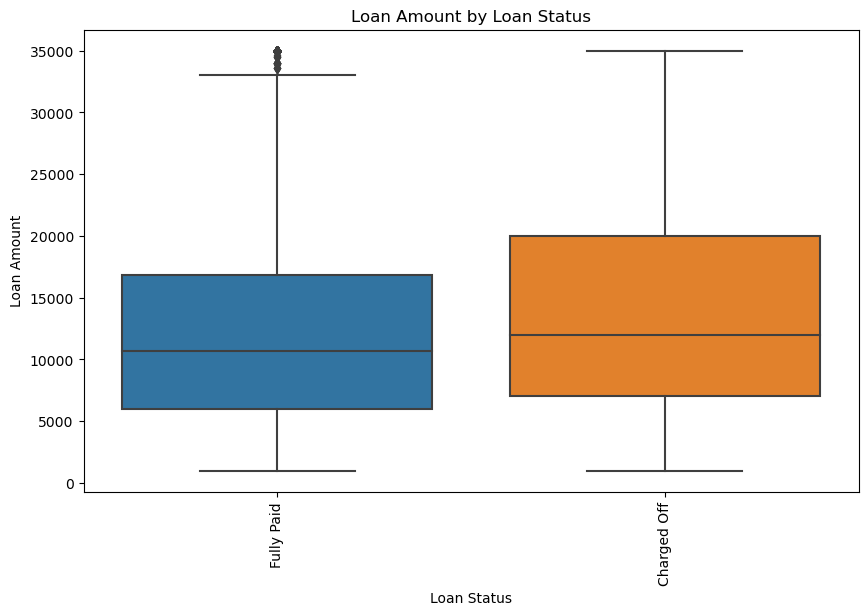

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df_cleaned)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
# Rotate x-axis labels to vertical
plt.xticks(rotation=90)
plt.show()

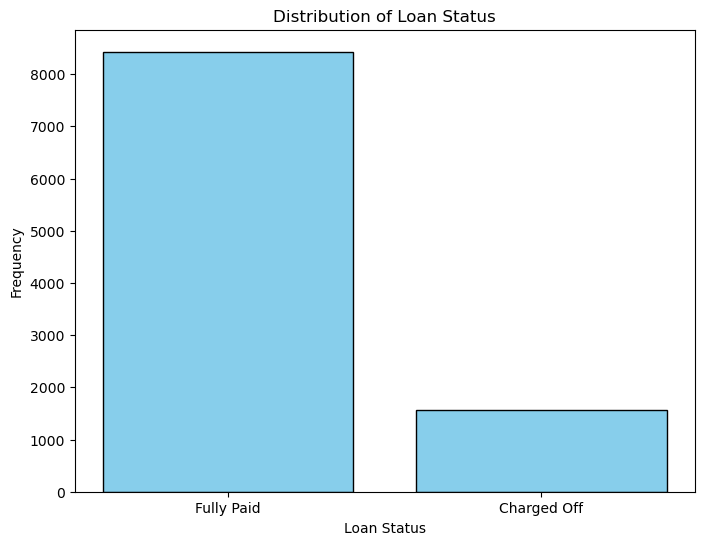

In [21]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
loan_status_counts = df_cleaned['loan_status'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(loan_status_counts.index, loan_status_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Fully Paid', 'Charged Off'])  # Assuming 0 is Fully Paid and 1 is Charged Off
plt.show()


In [22]:
print(df_cleaned['loan_status'].unique())

['Fully Paid' 'Charged Off']


In [23]:
# Map loan status to binary values
df_cleaned['loan_status'] = df_cleaned['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

# Verify the change
print(df_cleaned['loan_status'].unique())

[0 1]


In [24]:
df.shape

(10000, 142)

In [25]:
df_cleaned.shape

(10000, 35)

In [26]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   10000 non-null  int64  
 1   term                        10000 non-null  object 
 2   emp_title                   9348 non-null   object 
 3   emp_length                  9645 non-null   object 
 4   home_ownership              10000 non-null  object 
 5   annual_inc                  10000 non-null  float64
 6   verification_status         10000 non-null  object 
 7   loan_status                 10000 non-null  int64  
 8   pymnt_plan                  10000 non-null  object 
 9   purpose                     10000 non-null  object 
 10  title                       10000 non-null  object 
 11  zip_code                    10000 non-null  object 
 12  addr_state                  10000 non-null  object 
 13  dti                         1000

In [27]:
object_columns = df_cleaned.select_dtypes(include=['object']).columns
print(object_columns)

Index(['term', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'application_type'],
      dtype='object')


In [28]:
columns_to_encode = object_columns.drop(['zip_code', 'revol_util', 'earliest_cr_line', 'initial_list_status',  'emp_title', 'home_ownership',
       'verification_status', 'title', 'addr_state','application_type'])

In [29]:
columns_to_encode

Index(['term', 'emp_length', 'pymnt_plan', 'purpose'], dtype='object')

In [30]:
df_encoded = pd.get_dummies(df_cleaned, columns=columns_to_encode, drop_first=True)

In [31]:
df_encoded.shape

(10000, 54)

In [32]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   10000 non-null  int64  
 1   emp_title                   9348 non-null   object 
 2   home_ownership              10000 non-null  object 
 3   annual_inc                  10000 non-null  float64
 4   verification_status         10000 non-null  object 
 5   loan_status                 10000 non-null  int64  
 6   title                       10000 non-null  object 
 7   zip_code                    10000 non-null  object 
 8   addr_state                  10000 non-null  object 
 9   dti                         10000 non-null  float64
 10  delinq_2yrs                 10000 non-null  int64  
 11  earliest_cr_line            10000 non-null  object 
 12  fico_range_low              10000 non-null  int64  
 13  fico_range_high             1000

## Question 2 : Possible Modeling Approaches

### 1. Logistic Regression

**Example:** Implement a `LogisticRegression` model to predict `loan_status`. Logistic Regression is a simple yet effective model for binary classification problems.

**Pros:**
- **Interpretability:** Coefficients indicate how features influence the outcome, making it easy to understand.
- **Simplicity:** Quick to train and requires minimal computational resources.
- **Baseline Model:** Serves as a strong baseline for comparison against more complex models.

**Cons:**
- **Linearity Assumption:** Assumes a linear relationship between features and the log-odds of the target, which may not always be accurate.
- **Limited Complexity:** May struggle to capture non-linear relationships and feature interactions.

### 2. Random Forest

**Example:** Use a `RandomForestClassifier` to handle complex interactions between features and improve prediction accuracy.

**Pros:**
- **Performance:** Generally offers high accuracy due to its ensemble nature, which reduces overfitting.
- **Feature Importance:** Provides insights into which features are most important in making predictions.
- **Robustness:** Handles both numerical and categorical data well, and is less sensitive to outliers.

**Cons:**
- **Interpretability:** More challenging to interpret than Logistic Regression, as it involves multiple decision trees.
- **Computational Cost:** Requires more computational power and memory, especially with large datasets or many trees.

if the data is linearly separable, Logistic Regression is generally a good choice. However, if the relationship is more complex or non-linear, Random Forest may be a better option.

In [33]:
from sklearn.model_selection import train_test_split

# Step 1: Remove object variables
df_numeric = df_encoded.drop(columns=df_encoded.select_dtypes(include=['object']).columns)
# Drop rows with any NaN values
df_numeric = df_numeric.dropna()

In [34]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   10000 non-null  int64  
 1   annual_inc                  10000 non-null  float64
 2   loan_status                 10000 non-null  int64  
 3   dti                         10000 non-null  float64
 4   delinq_2yrs                 10000 non-null  int64  
 5   fico_range_low              10000 non-null  int64  
 6   fico_range_high             10000 non-null  int64  
 7   inq_last_6mths              10000 non-null  int64  
 8   open_acc                    10000 non-null  int64  
 9   pub_rec                     10000 non-null  int64  
 10  revol_bal                   10000 non-null  int64  
 11  total_acc                   10000 non-null  int64  
 12  last_pymnt_amnt             10000 non-null  float64
 13  last_fico_range_high        1000

In [35]:
# Step 2: Split the dataset into training and testing datasets
X = df_numeric.drop(columns='loan_status')  # Features
y = df_numeric['loan_status']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   10000 non-null  int64  
 1   annual_inc                  10000 non-null  float64
 2   dti                         10000 non-null  float64
 3   delinq_2yrs                 10000 non-null  int64  
 4   fico_range_low              10000 non-null  int64  
 5   fico_range_high             10000 non-null  int64  
 6   inq_last_6mths              10000 non-null  int64  
 7   open_acc                    10000 non-null  int64  
 8   pub_rec                     10000 non-null  int64  
 9   revol_bal                   10000 non-null  int64  
 10  total_acc                   10000 non-null  int64  
 11  last_pymnt_amnt             10000 non-null  float64
 12  last_fico_range_high        10000 non-null  int64  
 13  last_fico_range_low         1000

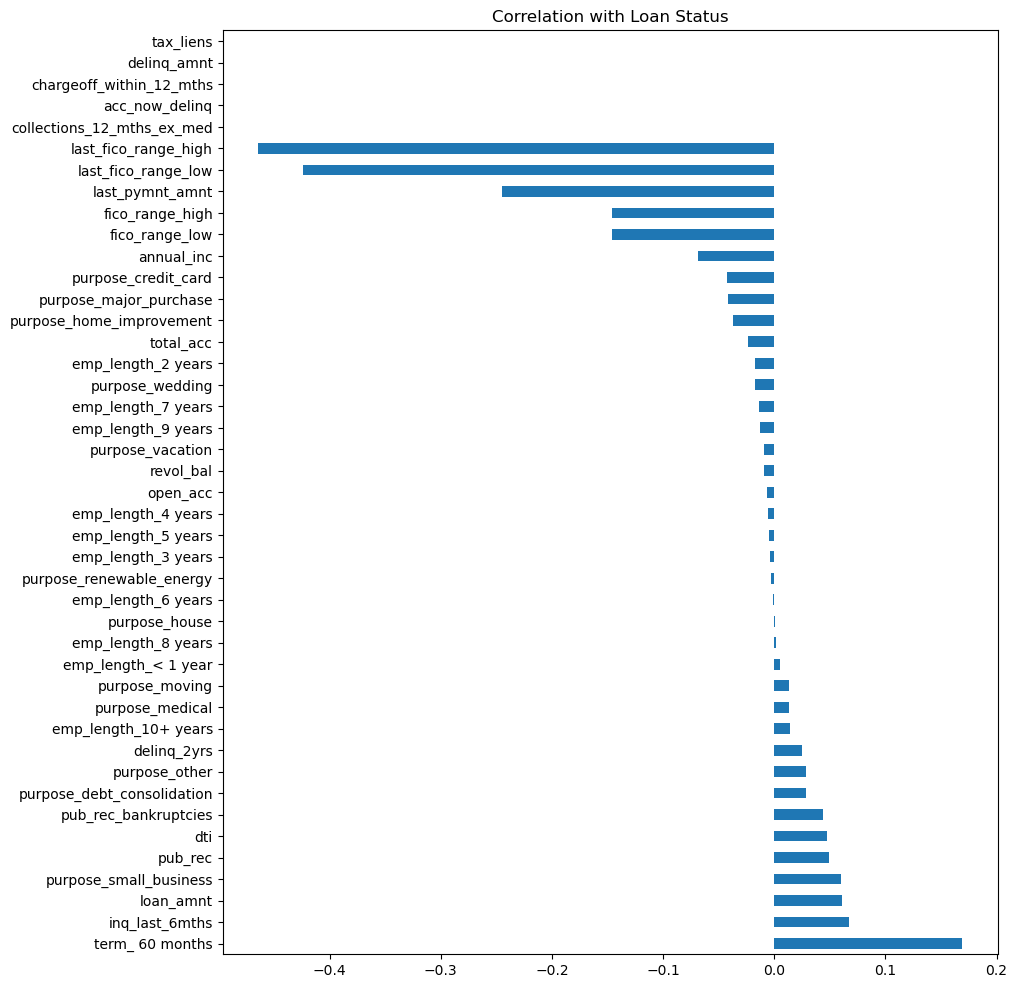

In [37]:
# correlation with target variable (loan_status)
correlation = df_numeric.corr()['loan_status'].sort_values(ascending=False)

# plot the correlation
plt.figure(figsize=(10, 12))
correlation.drop('loan_status').plot(kind='barh')
plt.title('Correlation with Loan Status')
plt.show()

### Note

We scale X_test using the parameters used to scale X_train in order to avoid data leakage

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Step 4: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # 



In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.8956666666666667
Confusion Matrix:
[[2415  123]
 [ 190  272]]


In [40]:
from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2538
           1       0.69      0.59      0.63       462

    accuracy                           0.90      3000
   macro avg       0.81      0.77      0.79      3000
weighted avg       0.89      0.90      0.89      3000



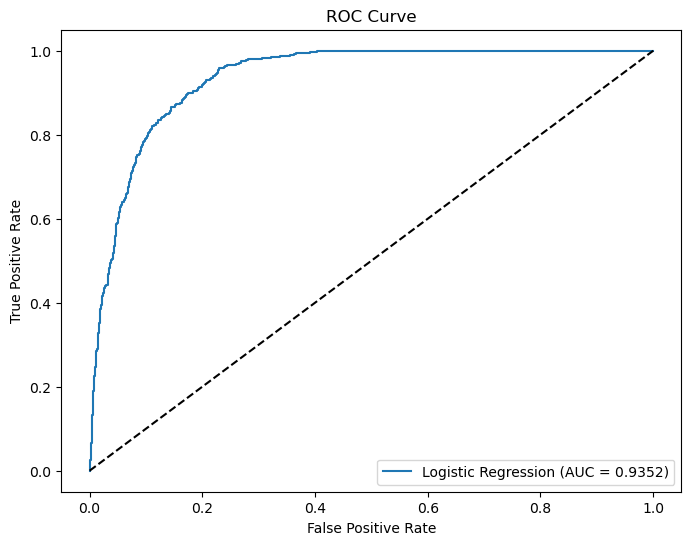

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random chance)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [42]:
import pandas as pd
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print(feature_importance)


                       Feature  Coefficient
0                    loan_amnt     0.688954
20             term_ 60 months     0.419320
10                   total_acc     0.250693
6               inq_last_6mths     0.149042
18        pub_rec_bankruptcies     0.089794
13         last_fico_range_low     0.068405
40      purpose_small_business     0.044157
9                    revol_bal     0.039947
3                  delinq_2yrs     0.027391
8                      pub_rec     0.014362
39    purpose_renewable_energy     0.007142
19                   tax_liens     0.000000
14  collections_12_mths_ex_med     0.000000
16    chargeoff_within_12_mths     0.000000
15              acc_now_delinq     0.000000
17                 delinq_amnt     0.000000
38               purpose_other    -0.003179
23          emp_length_3 years    -0.007552
41            purpose_vacation    -0.011669
37              purpose_moving    -0.013500
30         emp_length_< 1 year    -0.014840
2                          dti  

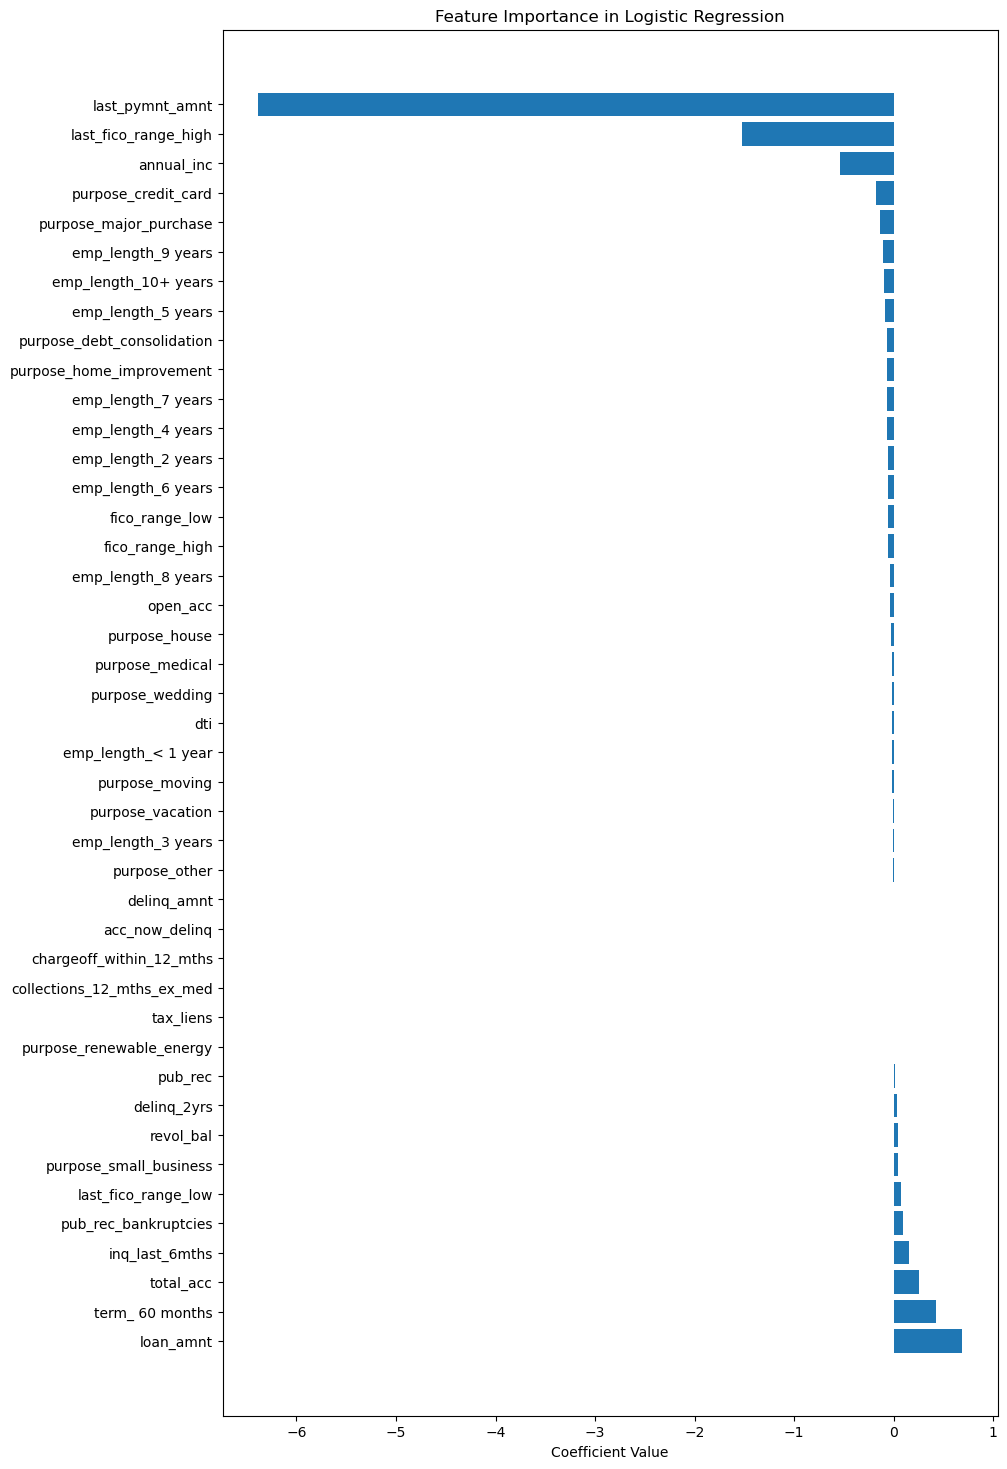

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 18))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()


## Interpretation and Feature Importance: 

The magnitude of the coefficient indicates the strength of the relationship. Larger coefficients (in absolute value) indicate that changes in the feature have a larger impact on the predicted probability.

The sign (positive or negative) of a coefficient indicates the direction of the relationship between the feature and the target. A positive coefficient means that as the feature value increases, the likelihood of the positive class (e.g., Fully Paid) increases. Conversely, a negative coefficient means that an increase in the feature value decreases the likelihood of the positive class.



# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8913
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2538
           1       0.71      0.49      0.58       462

    accuracy                           0.89      3000
   macro avg       0.81      0.73      0.76      3000
weighted avg       0.88      0.89      0.88      3000

Confusion Matrix:
[[2447   91]
 [ 235  227]]


In [45]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   10000 non-null  int64  
 1   term                        10000 non-null  object 
 2   emp_title                   9348 non-null   object 
 3   emp_length                  9645 non-null   object 
 4   home_ownership              10000 non-null  object 
 5   annual_inc                  10000 non-null  float64
 6   verification_status         10000 non-null  object 
 7   loan_status                 10000 non-null  int64  
 8   pymnt_plan                  10000 non-null  object 
 9   purpose                     10000 non-null  object 
 10  title                       10000 non-null  object 
 11  zip_code                    10000 non-null  object 
 12  addr_state                  10000 non-null  object 
 13  dti                         1000

In [46]:
import joblib
# Save the model using joblib

model_filename = 'random_forest_model.joblib'
joblib.dump(rf_model, model_filename)
print(f'Model saved to {model_filename}')

Model saved to random_forest_model.joblib


/home/mohamed/miniconda3/envs/data_protection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mohamed/miniconda3/envs/data_protection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mohamed/miniconda3/envs/data_protection/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


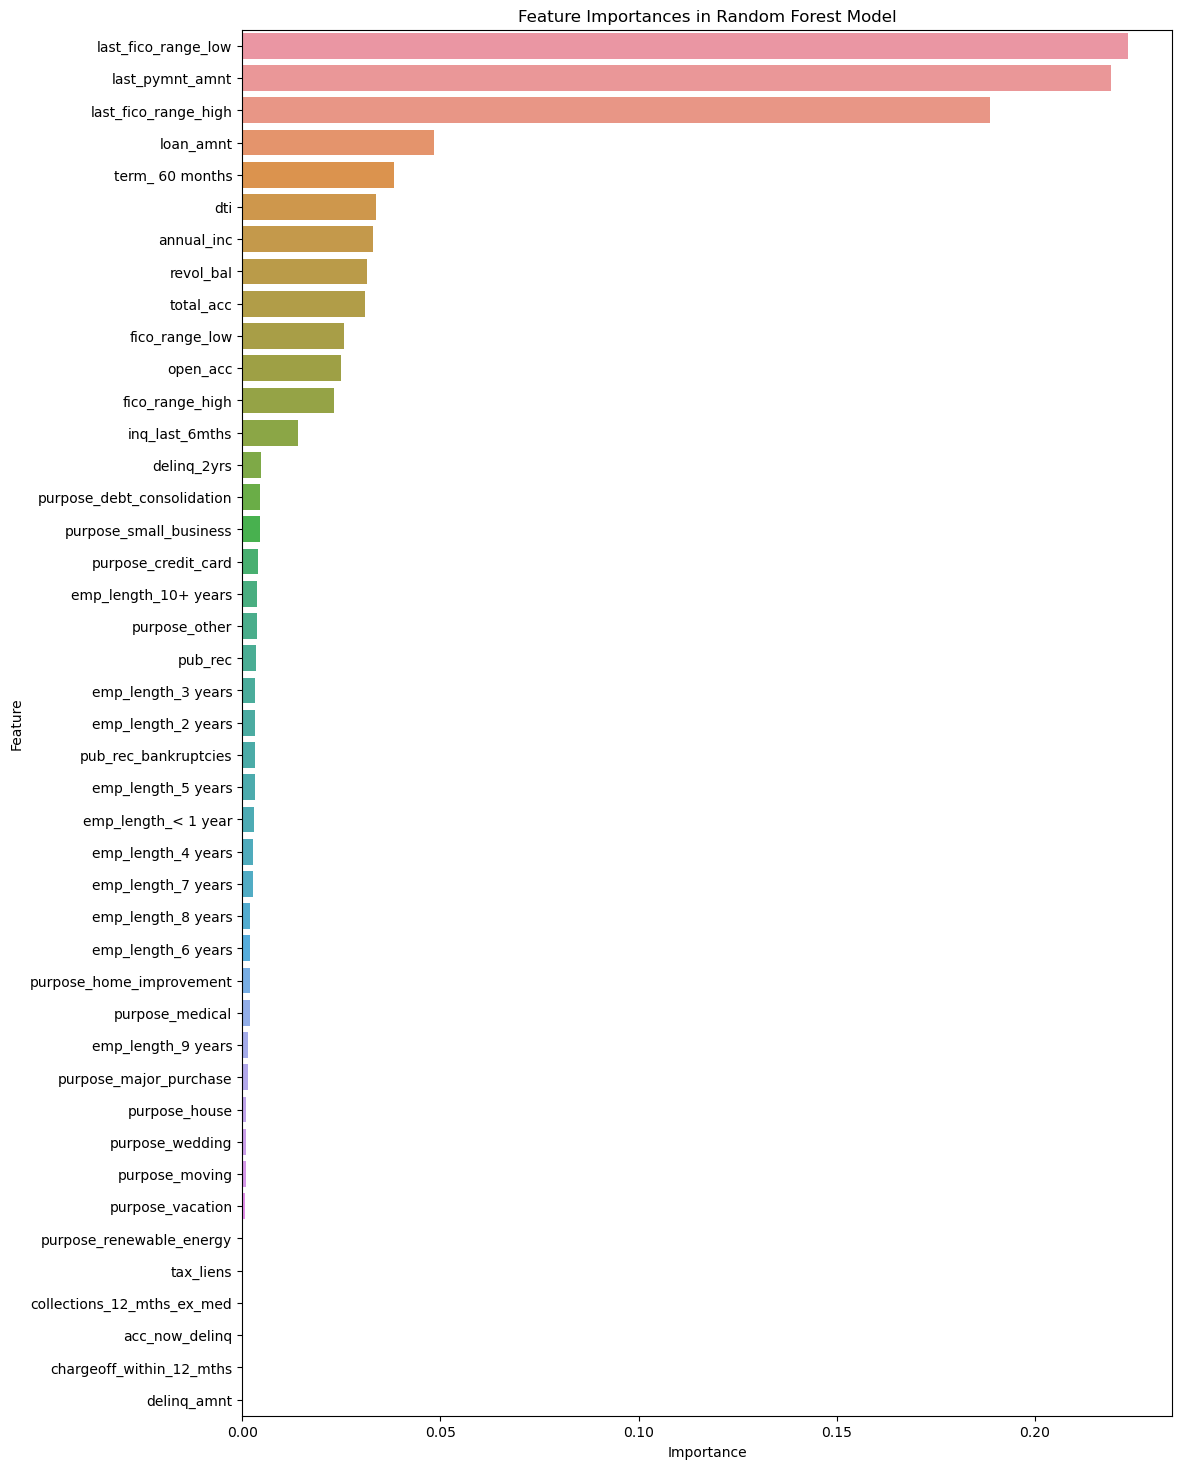

In [47]:
# Get feature importance
importances = rf_model.feature_importances_

# Create a DataFrame to hold the feature names and their importance
import pandas as pd

feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 18))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

while the magnitude of the coefficient determines the strength of the effect of the feature on the target, we can't know in wich direction the feature will affect the target.

for this case we will use shap values to interpret the effect of the features on the target  
**warning** : shap values are computationally expensive and may take a long time to compute here we will use a small sample of the data to compute the shap values

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


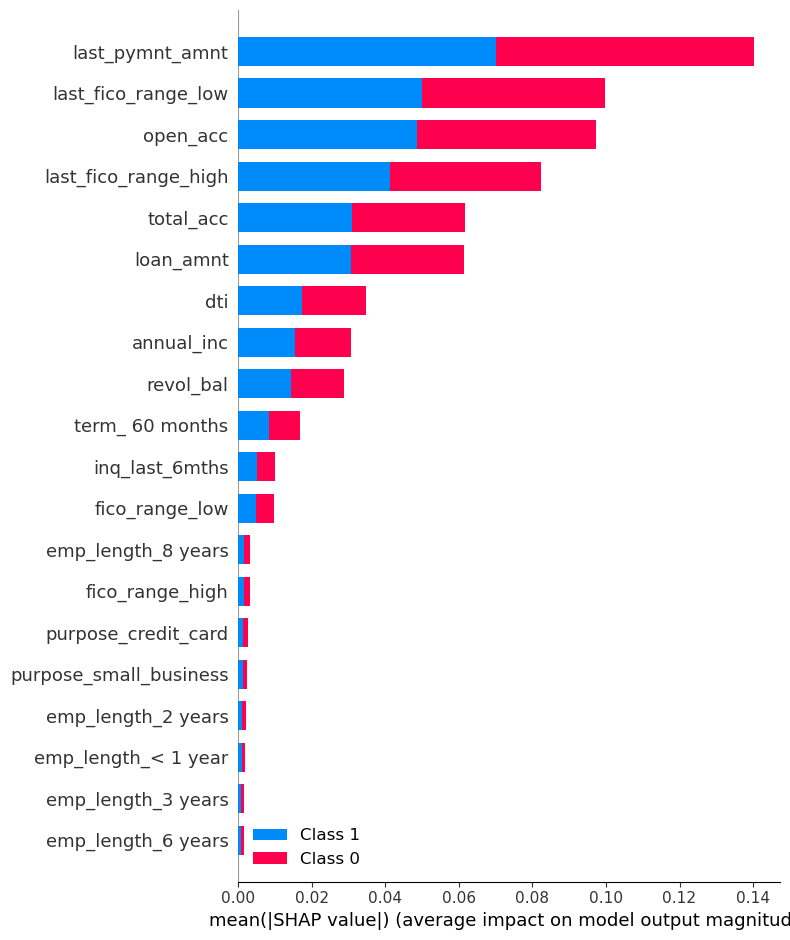

In [48]:
import shap

X_test_scaled_subset = X_test_scaled[:1000]

explainer = shap.Explainer(rf_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


The summary plot shows the feature importance of each feature in the model. 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


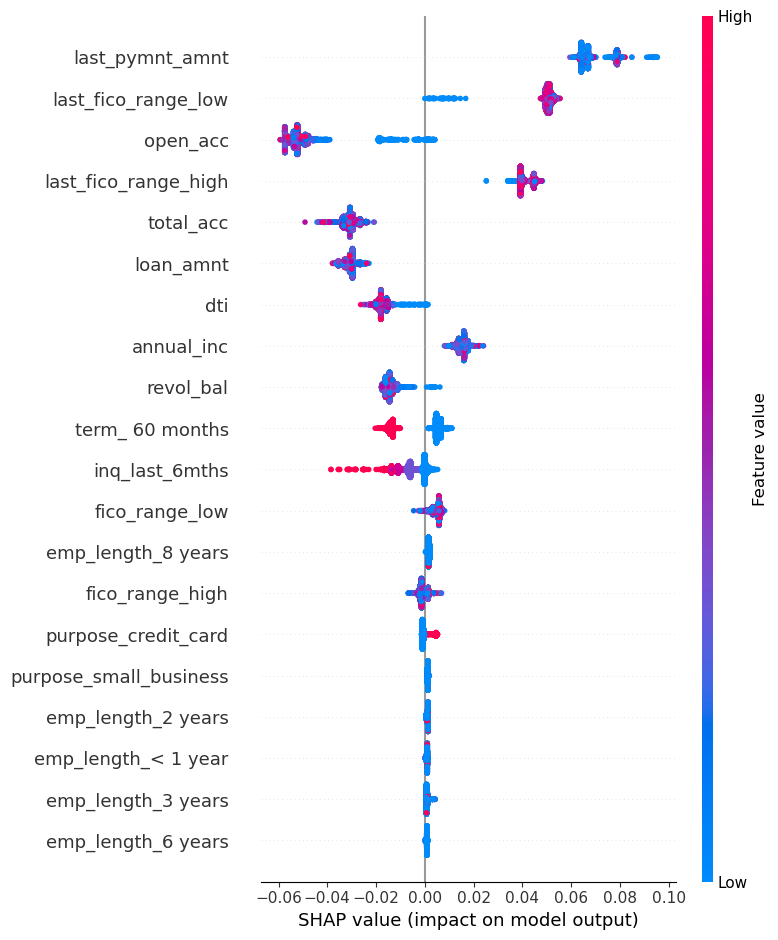

In [52]:
shap.summary_plot(shap_values[0], X_test)

## SHAP Summary Plot Explanation

The SHAP summary plot provides a comprehensive view of how each feature influences the predictions of your model for a given class. above for class 0

### Understanding the Plot

- **Features on the Y-Axis:** Each row represents a feature from the dataset. Features are sorted by their importance in influencing the model's predictions.

- **SHAP Values on the X-Axis:** The horizontal axis shows the SHAP values, which indicate the impact of each feature on the model's prediction. Positive SHAP values push the prediction higher, while negative values pull it lower.

- **Color Coding:** The color of each point represents the value of the feature. Blue for low values and red for high values is used.

- **Distribution of Points:** Each point represents a single prediction instance. The spread of points along the x-axis indicates how much variation there is in the feature's impact across different predictions. A wider spread suggests more variability in feature impact.

## Question 4 : Additional Steps for Model Enhancement

If I had more time or resources, I would take the following steps to enhance the model, improve its performance, and increase robustness:

### 1. Hyperparameter Tuning
To optimize the performance of the `RandomForestClassifier`, I would perform more thorough hyperparameter tuning using the following methods:
- **Grid Search or Random Search:** To find the optimal set of parameters by exhaustively searching through specified parameter values.
- **Bayesian Optimization:** To efficiently explore the hyperparameter space, which might be more effective than grid search.

### 4. Model Ensembling
I would create an ensemble of different models to capture various patterns in the data:
- **Combine Multiple Models:** Build an ensemble using models like Gradient Boosting Machines, XGBoost, LightGBM, and Random Forest.
- **Stacking Models:** Implement a stacking approach where predictions from multiple models are combined using a meta-model.

### 5. Advanced Feature Selection
To improve the model's efficiency and interpretability, I would employ advanced feature selection techniques:
- **Recursive Feature Elimination (RFE):** Systematically select the most important features by recursively eliminating less important ones.
- **L1 Regularization (Lasso):** Use Lasso regression for feature selection by penalizing less important features.

### 6. Cross-Validation
To ensure model performance is consistent and not overly reliant on a specific train-test split, I would:
- **K-Fold Cross-Validation:** Implement K-Fold cross-validation to assess model performance across multiple subsets.
- **Stratified Cross-Validation:** Use stratified cross-validation to maintain the balance of classes in each fold, particularly important given any class imbalance.

### 7. Addressing Class Imbalance with other Techniques
To address potential class imbalance in the dataset:
- **SMOTE or ADASYN:** Apply synthetic over-sampling techniques like SMOTE or ADASYN to balance the classes.
- **Class Weight Adjustment:** Adjust the class weights in the RandomForestClassifier to give more importance to the minority class.

### 8. Explainability and Interpretability
To enhance model transparency and stakeholder trust:
- **More Explainability Techniques:** Explore other explainability methods such as LIME (Local Interpretable Model-agnostic Explanations).
- **Model Interpretation Tools:** Use tools like `Eli5` or `LIME` to provide more interpretable models.

### 9. Robustness Checks
To ensure the robustness of the model:
- **Outlier Detection:** Perform outlier detection and removal to improve the model's performance.
- **Adversarial Validation:** Ensure the training and test data are from the same distribution, avoiding data leakage.

### 9. Model Deployment
To ensure the model is production-ready:
- **Deploy on Cloud:** Deploy the model as a microservice using cloud platforms like AWS, Google Cloud, or Azure.
- **Dockerization:** Package the model into a Docker container for easy deployment and scaling.
- **Monitoring and Maintenance:** Implement monitoring for model performance in production, enabling detection and mitigation of model drift or data shift over time.

### Additional Datasets to Enrich the Original Dataset

To improve the model's predictive accuracy and provide more context, I would consider integrating the following datasets:

### 1. Credit Bureau Data
- **Credit Reports:** Integrate data from credit bureaus (e.g., TransUnion, Equifax, or Experian) to provide more detailed credit history information.

### 2. Economic Indicators
- **Macroeconomic Data:** Include macroeconomic indicators like unemployment rates, inflation, interest rates, and GDP growth from sources such as the Federal Reserve or World Bank.

### 3. Behavioral Data
- **Transaction Data:** If available, integrate transaction-level data from borrowers' bank accounts or credit cards to gain insights into spending patterns.
- **Payment History:** Include detailed payment history, including payment dates and amounts, which could predict future payment behavior.

### 4. Demographic Data
- **Census Data:** Enrich the dataset with demographic information such as age, education level, employment status, and household income from census data.
- **Employment Data:** Incorporate detailed employment data, including job stability, industry, and employment tenure.

### 5. Time Series Data
- **Temporal Features:** Create time series features based on the date of loan issuance, considering seasonal patterns or economic cycles.




## Question 5 : Scalability Discussion

### a. Number of Loans/Rows in the Training Data

The scalability of my solution largely depends on the amount of data it needs to process during training. As the number of loans/rows in the dataset increases, several factors come into play:

1. **Memory Usage:** 
   - The `RandomForestClassifier` is an ensemble learning method that constructs multiple decision trees during training. The memory required increases with the size of the training data and the number of trees. For very large datasets, this could lead to high memory consumption, potentially requiring more RAM or distributed computing resources.

2. **Training Time:**
   - Training time increases with the number of rows in the dataset. While `RandomForestClassifier` is relatively efficient, large datasets can still result in lengthy training times. To address this, I could:
     - **Use Parallel Processing:** Leverage multi-core CPUs to train trees in parallel, which can significantly reduce training time.
     - **Reduce Data Dimensionality:** Employ feature selection or dimensionality reduction techniques to minimize the number of features, thereby speeding up the training process.
     - **Use Cloud Resources:** Utilize cloud platforms with scalable resources (e.g., AWS EC2 instances with large memory or distributed computing like AWS EMR or Spark) to handle larger datasets efficiently.

3. **Incremental Learning:**
   - For extremely large datasets that may not fit into memory at once, an incremental learning approach (e.g., using `partial_fit` with models that support it) could be considered. Although `RandomForestClassifier` does not natively support incremental learning, I could explore other models like a linear regression that performs also well.

### b. Number of Predictions in Production

The scalability of the inference endpoint in production depends on the number of predictions it needs to make and the speed at which these predictions are required:

1. **Inference Latency:**
   - **Low Latency Requirements:** If the application requires real-time or near-real-time predictions, I need to ensure the model can make predictions quickly. `RandomForestClassifier` is generally fast at inference due to its tree-based structure, but latency could become an issue with an extremely large number of requests. To mitigate this:
     - **Optimized Deployment:** Deploy the model on a powerful server or use specialized hardware (e.g., GPUs or TPUs) to speed up inference.
     - **Model Simplification:** Consider simplifying the model by reducing the number of trees or using a different algorithm that offers faster inference times.

2. **Throughput:**
   - **High Throughput Requirements:** For applications requiring a large number of predictions simultaneously (e.g., batch processing or a high-traffic web service), I could:
     - **Horizontal Scaling:** Use horizontal scaling (e.g., deploying multiple instances of the model) to handle a higher volume of requests.
     - **Load Balancing:** Implement a load balancer to distribute prediction requests across multiple instances, ensuring that no single server becomes a bottleneck.

3. **Batch vs. Real-Time Predictions:**
   - **Batch Processing:** For scenarios where predictions can be made in bulk (e.g., processing thousands of loan applications overnight), I could batch the requests and process them in parallel, optimizing resource usage.
   - **Asynchronous Processing:** Implement asynchronous processing where predictions are queued and processed as resources become available, which is useful in managing bursts of prediction requests.

4. **Containerization and Microservices:**
   - **Docker:** Packaging the model in a Docker container ensures that it can be easily scaled across different environments. By deploying the container on a Kubernetes cluster, I can dynamically scale the number of replicas based on the load, ensuring high availability and scalability.
   - **Microservices Architecture:** Decompose the prediction service into microservices that can independently scale, allowing different components (e.g., feature preprocessing, model inference, post-processing) to scale according to demand.

5. **Monitoring and Auto-Scaling:**
   - Implement monitoring tools to track the performance of the inference endpoint in production. Using tools like Prometheus and Grafana, I can set up auto-scaling rules that trigger the deployment of additional resources when the load increases, ensuring the system remains responsive.

